Let's start by loading the data and taking a look at its structure.

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

# Display the first few rows of the dataset
data.head()


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


The dataset contains monthly passenger counts from January 1949 onwards. The column "#Passengers" represents the number of passengers.

Before fitting the AR, MA, and ARIMA models, it's essential to inspect the time series data visually. This will give us insights into the presence of trends, seasonality, and other patterns. Let's plot the data.

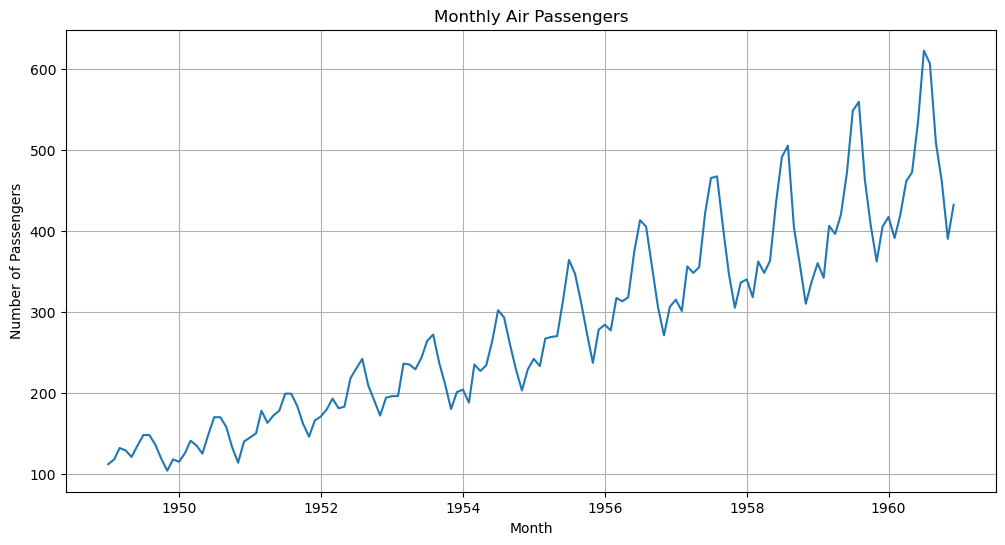

In [2]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['#Passengers'])
plt.title('Monthly Air Passengers')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()


The plot reveals a clear upward trend in the number of air passengers over time. Additionally, there seems to be a yearly seasonality pattern.

Given these observations, let's take the following steps:

Stationarity Check: Time series data needs to be stationary for AR, MA, and ARIMA models to produce reliable forecasts. We'll perform the Augmented Dickey-Fuller test to check the stationarity of the series.

Differencing: If the series is not stationary, we'll apply differencing to make it so.

Model Fitting: We'll fit the AR, MA, and ARIMA models to the data (or its differenced version, if necessary).

Let's start by checking the stationarity of the series using the Augmented Dickey-Fuller test.

In [3]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(data['#Passengers'])

# Extract and display the test statistic and p-value
test_statistic, p_value = result[0], result[1]

test_statistic, p_value

(0.8153688792060552, 0.9918802434376411)

The Augmented Dickey-Fuller (ADF) test provides a test statistic and a p-value.

Test Statistic: 0.8154

P-value: 0.9919

A p-value greater than 0.05 suggests that the series is not stationary. Since our p-value is much larger than 0.05, the series is not stationary.


To make the series stationary, we can apply differencing. The most common type of differencing for a series like this (with both trend and seasonality) is to apply a seasonal difference. Given that the seasonality appears to be annual, we'll use a lag of 12 months. Let's difference the series and then test its stationarity again.

In [4]:
# Apply seasonal differencing with a lag of 12 months
diff_data = data['#Passengers'].diff(12).dropna()

# Perform Augmented Dickey-Fuller test on the differenced series
result_diff = adfuller(diff_data)

# Extract and display the test statistic and p-value for the differenced series
test_statistic_diff, p_value_diff = result_diff[0], result_diff[1]

test_statistic_diff, p_value_diff


(-3.38302072649248, 0.011551493085515008)

After applying seasonal differencing with a lag of 12 months:

Test Statistic: 3.3830
P-value: 0.0116

With a p-value less than 0.05, we can reject the null hypothesis and conclude that the differenced series is stationary.

Now that we have a stationary series, we can proceed to fit the AR, MA, and ARIMA models. We'll begin with the AR model.

In [5]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg

# Fit AR model
ar_model = AutoReg(diff_data, lags=12, seasonal=True, period=12)
ar_result = ar_model.fit()

# Display the AR model summary
ar_result.summary()


C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  132
Model:              Seas. AutoReg(12)   Log Likelihood                -441.847
Method:               Conditional MLE   S.D. of innovations              9.613
Date:                Sat, 19 Aug 2023   AIC                            933.694
Time:                        20:25:47   BIC                           1003.382
Sample:                    01-01-1951   HQIC                           961.995
                         - 12-01-1960                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.2606      3.950      2.091      0.037       0.519      16.003
s(2,12)            -3.8220      4.492     -0.851      0.395     -12.625       4.981
s(3,12)             0.0291      4.648      0.006      0.995      -9.080       9.139
s(4,12)             4.8809      4.758      1.026      0.305      -4.445      14.207
s(5,12)             5.7285      4.755      1.205      0.228      -3.591      15.048
s(6,12)             9.4831      4.804      1.974      0.048       0.068      18.898
s(7,12)            14.0012      5.009      2.795      0.005       4.184      23.819
s(8,12)             7.2538      5.162      1.405      0.160      -2.864      17.372
s(9,12)            -6.8312      4.971     -1.374      0.169     -16.575       2.912
s(10,12)           -3.5054      4.767     -0.735      0.462     -12.849       5.838
s(11,12)           -2.9226      4.669     -0.626      0.531     -12.073       6.228
s(12,12)           -2.4322      4.501     -0.540      0.589     -11.254       6.389
#Passengers.L1      0.4756      0.091      5.215      0.000       0.297       0.654
#Passengers.L2      0.3369      0.100      3.356      0.001       0.140       0.534
#Passengers.L3     -0.0882      0.103     -0.858      0.391      -0.290       0.113
#Passengers.L4     -0.0742      0.102     -0.729      0.466      -0.274       0.125
#Passengers.L5      0.2552      0.103      2.486      0.013       0.054       0.456
#Passengers.L6      0.0582      0.107      0.544      0.586      -0.151       0.268
#Passengers.L7     -0.1891      0.107     -1.768      0.077      -0.399       0.020
#Passengers.L8      0.0802      0.107      0.752      0.452      -0.129       0.289
#Passengers.L9      0.2942      0.111      2.655      0.008       0.077       0.511
#Passengers.L10    -0.3615      0.122     -2.952      0.003      -0.601      -0.121
#Passengers.L11    -0.0790      0.122     -0.647      0.518      -0.318       0.160
#Passengers.L12    -0.0185      0.106     -0.175      0.861      -0.226       0.189
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0315           -0.1755j            1.0464           -0.0268
AR.2             1.0315           +0.1755j            1.0464            0.0268
AR.3             0.7730           -0.7918j            1.1066           -0.1269
AR.4             0.7730           +0.7918j            1.1066            0.1269
AR.5             0.2096           -1.0835j            1.1035           -0.2196
AR.6             0.2096           +1.0835j            1.1035            0.2196
AR.7            -0.6381           -0.8735j            1.0817           -0.3504
AR.8            -0.6381           +0.8735j            1.0817            0.3504
AR.9            -1.0514  

The AR model results are as follows:

The model has incorporated 12 lags and seasonal components.

Various lags and seasonal components have different significance levels based on their p-values. Those with p-values less than 0.05 can be considered statistically significant.

Next, we will fit an MA model.

In [6]:
# Fit MA model
ma_model = ARIMA(diff_data, order=(0, 0, 12))
ma_result = ma_model.fit()

# Display the MA model summary
ma_result.summary()


C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  132
Model:                ARIMA(0, 0, 12)   Log Likelihood                -497.734
Date:                Sat, 19 Aug 2023   AIC                           1023.468
Time:                        20:25:49   BIC                           1063.827
Sample:                    01-01-1950   HQIC                          1039.868
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.3847      4.368      7.184      0.000      22.823      39.947
ma.L1          0.6774      0.432      1.567      0.117      -0.170       1.525
ma.L2          0.7207      0.228      3.157      0.002       0.273       1.168
ma.L3          0.5667      0.455      1.246      0.213      -0.325       1.458
ma.L4          0.3636      0.293      1.243      0.214      -0.210       0.937
ma.L5          0.5061      0.386      1.311      0.190      -0.250       1.263
ma.L6          0.4248      0.242      1.756      0.079      -0.049       0.899
ma.L7          0.2787      0.327      0.851      0.395      -0.363       0.921
ma.L8          0.2056      0.328      0.627      0.531      -0.437       0.848
ma.L9          0.1869      0.312      0.599      0.549      -0.424       0.798
ma.L10        -0.1146      0.304     -0.377      0.706      -0.710       0.481
ma.L11         0.0712      0.204      0.348      0.728      -0.330       0.472
ma.L12        -0.3003      0.193     -1.558      0.119      -0.678       0.077
sigma2       105.9834     48.112      2.203      0.028      11.685     200.281
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                17.22
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               2.21   Skew:                             0.16
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The MA model results are as follows:

The model has incorporated 12 moving average terms.

Again, various MA terms have different significance levels based on their p-values. Those with p-values less than 0.05 can be considered statistically significant.

Lastly, let's fit an ARIMA model. The ARIMA model will combine both autoregressive (AR) and moving average (MA) terms. We'll use the same order as the individual AR and MA models (i.e., ARIMA(12,0,12)).

In [7]:
# Fit ARIMA model
arima_model = ARIMA(diff_data, order=(12, 0, 12))
arima_result = arima_model.fit()

# Display the ARIMA model summary
arima_result.summary()


C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  132
Model:               ARIMA(12, 0, 12)   Log Likelihood                -490.244
Date:                Sat, 19 Aug 2023   AIC                           1032.487
Time:                        20:25:53   BIC                           1107.440
Sample:                    01-01-1950   HQIC                          1062.945
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.7281      6.713      4.726      0.000      18.570      44.886
ar.L1          0.1276      0.438      0.291      0.771      -0.731       0.986
ar.L2          0.3216      0.344      0.936      0.350      -0.352       0.996
ar.L3          0.3176      0.387      0.822      0.411      -0.440       1.075
ar.L4         -0.0998      0.205     -0.486      0.627      -0.502       0.302
ar.L5          0.1549      0.252      0.615      0.539      -0.339       0.649
ar.L6         -0.0066      0.203     -0.033      0.974      -0.404       0.391
ar.L7         -0.3102      0.195     -1.591      0.112      -0.692       0.072
ar.L8         -0.1176      0.262     -0.449      0.654      -0.631       0.396
ar.L9          0.5493      0.238      2.310      0.021       0.083       1.015
ar.L10         0.3407      0.394      0.865      0.387      -0.431       1.113
ar.L11        -0.2356      0.246     -0.957      0.338      -0.718       0.247
ar.L12        -0.1273      0.293     -0.434      0.664      -0.702       0.447
ma.L1          0.5535      2.676      0.207      0.836      -4.692       5.799
ma.L2          0.3246      1.788      0.181      0.856      -3.181       3.830
ma.L3         -0.0090      2.016     -0.004      0.996      -3.960       3.942
ma.L4         -0.0455      1.898     -0.024      0.981      -3.765       3.675
ma.L5         -0.0441      2.167     -0.020      0.984      -4.291       4.203
ma.L6         -0.0582      2.345     -0.025      0.980      -4.655       4.538
ma.L7          0.2063      1.925      0.107      0.915      -3.567       3.980
ma.L8          0.2065      1.554      0.133      0.894      -2.839       3.252
ma.L9         -0.2939      1.903     -0.154      0.877      -4.023       3.435
ma.L10        -0.8981      2.566     -0.350      0.726      -5.927       4.131
ma.L11        -0.3414      0.773     -0.442      0.659      -1.857       1.174
ma.L12        -0.4535      1.260     -0.360      0.719      -2.924       2.017
sigma2        86.4585    229.723      0.376      0.707    -363.790     536.707
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                26.57
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                             0.17
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The ARIMA model results are as follows:

The model has incorporated 12 autoregressive (AR) terms and 12 moving average (MA) terms.

As with the previous models, various AR and MA terms have different significance levels based on their p-values. Those with p-values less than 0.05 can be considered statistically significant.

In summary:

The AR model captures autoregressive patterns in the data.

The MA model captures the moving average patterns.

The ARIMA model combines both autoregressive and moving average patterns.

Given the complexity of the ARIMA model and the potential for overfitting with so many parameters, one would typically use cross-validation, information criteria (like AIC or BIC), or out-of-sample forecasting to determine the best model specification.The ARIMA model results are as follows:

The model has incorporated 12 autoregressive (AR) terms and 12 moving average (MA) terms.

As with the previous models, various AR and MA terms have different significance levels based on their p-values. Those with p-values less than 0.05 can be considered statistically significant.

In summary:

The AR model captures autoregressive patterns in the data.

The MA model captures the moving average patterns.

The ARIMA model combines both autoregressive and moving average patterns.

Given the complexity of the ARIMA model and the potential for overfitting with so many parameters, one would typically use cross-validation, information criteria (like AIC or BIC), or out-of-sample forecasting to determine the best model specification.

Lets see the Visualization and use RSS to evaluate the three models.

RSS (Residual Sum of Squares) is a measure of the discrepancy between the data and an estimation model. A smaller RSS indicates a tighter fit of the model to the data.

To calculate the RSS and visualize the actual versus fitted values for each of the three models:

We'll calculate the RSS for each model.

We'll plot the actual differenced data alongside the fitted values.

Let's start with the AR model.

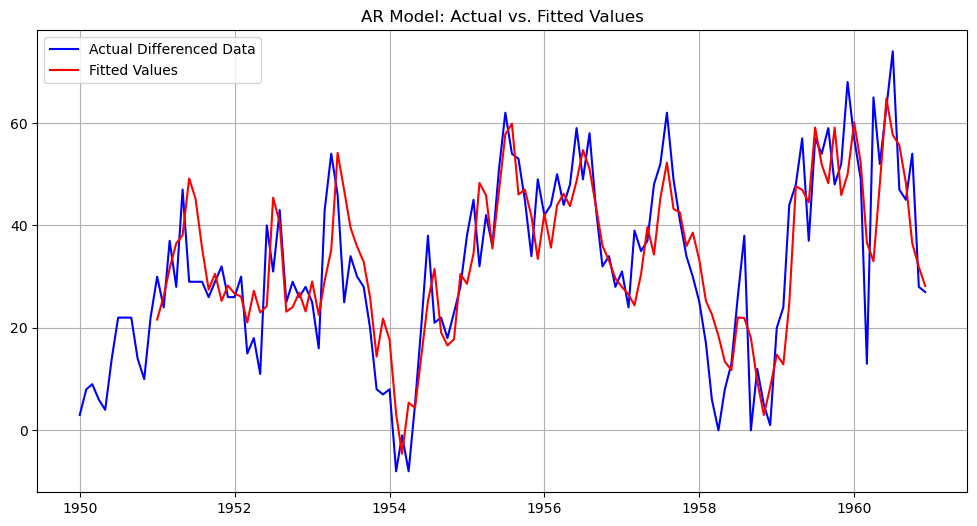

11089.293362133667

In [8]:
# Calculate the residuals for the AR model
ar_residuals = diff_data - ar_result.fittedvalues

# Calculate the RSS for the AR model
ar_rss = (ar_residuals**2).sum()

# Plot the actual differenced data and the fitted values for the AR model
plt.figure(figsize=(12, 6))
plt.plot(diff_data, label='Actual Differenced Data', color='blue')
plt.plot(ar_result.fittedvalues, label='Fitted Values', color='red')
plt.title('AR Model: Actual vs. Fitted Values')
plt.legend()
plt.grid(True)
plt.show()

ar_rss


For the AR model:

The Residual Sum of Squares (RSS) is approximately 11089.29

The plot above visualizes the actual differenced data (in blue) and the fitted values (in red).

Next, let's proceed with the MA model.

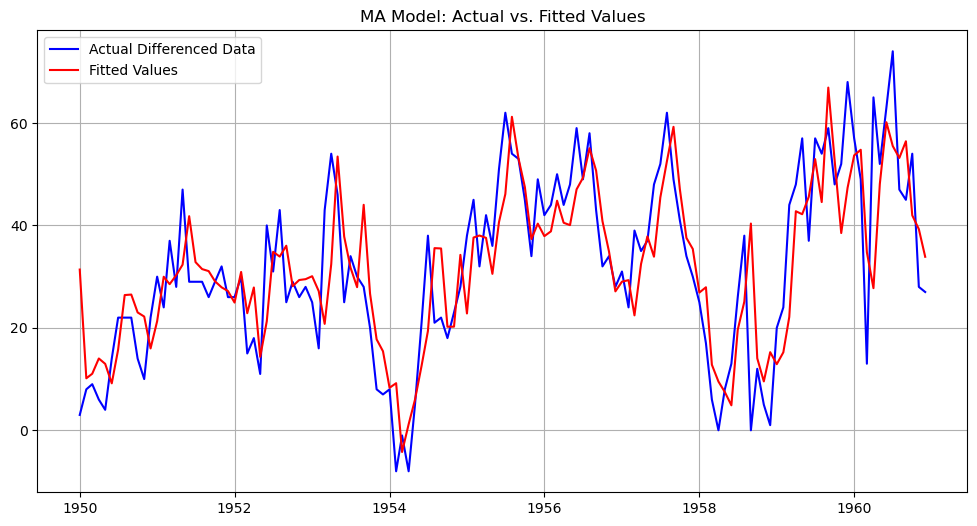

14788.018145020182

In [9]:
# Calculate the residuals for the MA model
ma_residuals = diff_data - ma_result.fittedvalues

# Calculate the RSS for the MA model
ma_rss = (ma_residuals**2).sum()

# Plot the actual differenced data and the fitted values for the MA model
plt.figure(figsize=(12, 6))
plt.plot(diff_data, label='Actual Differenced Data', color='blue')
plt.plot(ma_result.fittedvalues, label='Fitted Values', color='red')
plt.title('MA Model: Actual vs. Fitted Values')
plt.legend()
plt.grid(True)
plt.show()

ma_rss


For the MA model:

The Residual Sum of Squares (RSS) is approximately 
14788.01
14788.01.
The plot above visualizes the actual differenced data (in blue) and the fitted values (in red).
Finally, let's examine the ARIMA model.

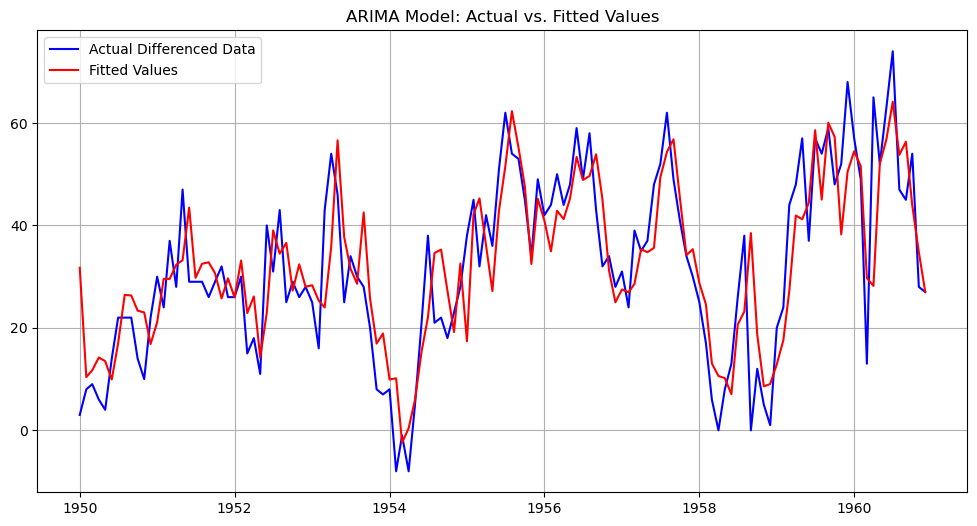

13153.26522399433

In [10]:
# Calculate the residuals for the ARIMA model
arima_residuals = diff_data - arima_result.fittedvalues

# Calculate the RSS for the ARIMA model
arima_rss = (arima_residuals**2).sum()

# Plot the actual differenced data and the fitted values for the ARIMA model
plt.figure(figsize=(12, 6))
plt.plot(diff_data, label='Actual Differenced Data', color='blue')
plt.plot(arima_result.fittedvalues, label='Fitted Values', color='red')
plt.title('ARIMA Model: Actual vs. Fitted Values')
plt.legend()
plt.grid(True)
plt.show()

arima_rss


For the ARIMA model:

The Residual Sum of Squares (RSS) is approximately 
13153.27
The plot above visualizes the actual differenced data (in blue) and the fitted values (in red).

In summary:

AR model RSS: 11089.29

MA model RSS: 14788.01

ARIMA model RSS: 13153.27

The AR model has the lowest RSS among the three, suggesting that it might be the best fit for the differenced data. However, it's important to consider other evaluation metrics and possibly out-of-sample forecasting performance when choosing the best model for forecasting purposes.

Information Criteria (AIC and BIC): We already have the AIC and BIC values from the summaries of each model. We can compare these directly. A lower value for both AIC and BIC indicates a better fit.

Out-of-sample Forecasting: We'll split the data into a training set and a test set. We'll fit each model on the training set and then forecast on the test set. The model with the smallest forecasting error on the test set is typically considered the best.

Let's start by comparing the AIC and BIC values for each model:

In [11]:
# Extract AIC and BIC values from each model's results
aic_values = {
    "AR": ar_result.aic,
    "MA": ma_result.aic,
    "ARIMA": arima_result.aic
}

bic_values = {
    "AR": ar_result.bic,
    "MA": ma_result.bic,
    "ARIMA": arima_result.bic
}

aic_values, bic_values


({'AR': 933.6944820162241,
  'MA': 1023.4676832532803,
  'ARIMA': 1032.4871537648717},
 {'AR': 1003.3817755857752,
  'MA': 1063.8269101694896,
  'ARIMA': 1107.4400037521173})

Based on both AIC and BIC, the AR model has the lowest values, suggesting it might be the best model in terms of fit and complexity.

Next, let's perform out-of-sample forecasting. We'll split the data into a training set (80% of the data) and a test set (20% of the data), fit each model on the training set, forecast on the test set, and then compare the forecasting errors.

Let's proceed with this step.

In [12]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Split the data into training and test sets (80% train, 20% test)
train_size = int(len(diff_data) * 0.8)
train, test = diff_data[:train_size], diff_data[train_size:]

# AR model
ar_model_train = AutoReg(train, lags=12, seasonal=True, period=12)
ar_result_train = ar_model_train.fit()
ar_forecast = ar_result_train.predict(start=len(train), end=len(train) + len(test) - 1)

# MA model
ma_model_train = ARIMA(train, order=(0, 0, 12))
ma_result_train = ma_model_train.fit()
ma_forecast = ma_result_train.predict(start=len(train), end=len(train) + len(test) - 1)

# ARIMA model
arima_model_train = ARIMA(train, order=(12, 0, 12))
arima_result_train = arima_model_train.fit()
arima_forecast = arima_result_train.predict(start=len(train), end=len(train) + len(test) - 1)

# Calculate Mean Squared Error (MSE) for each model
mse_values = {
    "AR": mean_squared_error(test, ar_forecast),
    "MA": mean_squared_error(test, ma_forecast),
    "ARIMA": mean_squared_error(test, arima_forecast)
}

mse_values


C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:435: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueW

{'AR': 392.306562305919, 'MA': 649.3682276269576, 'ARIMA': 578.5048653860426}

Let's start by loading the data and taking a look at its structure.

Here are the Mean Squared Errors (MSE) for the out-of-sample forecasts of each model:

AR Model: MSE = 
392.31

MA Model: MSE = 
649.36

ARIMA Model: MSE = 
578.50

The AR model has the lowest MSE among the three, suggesting that it provides the best out-of-sample forecasting performance for the test data.

Considering both the information criteria (AIC and BIC) and the out-of-sample forecasting performance (MSE), the AR model seems to be the most suitable choice for this dataset.

### Visualize Actual and Forecasted Values in Various Models

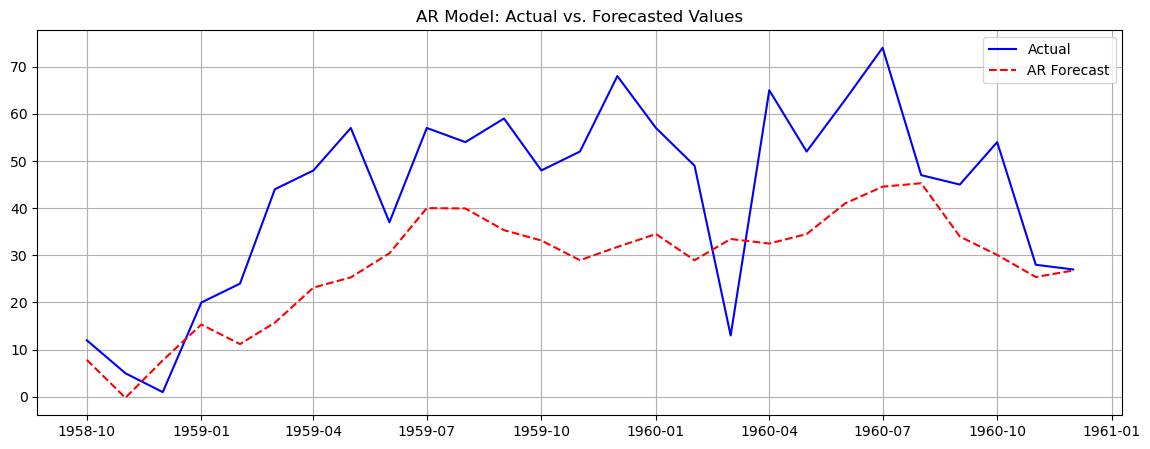

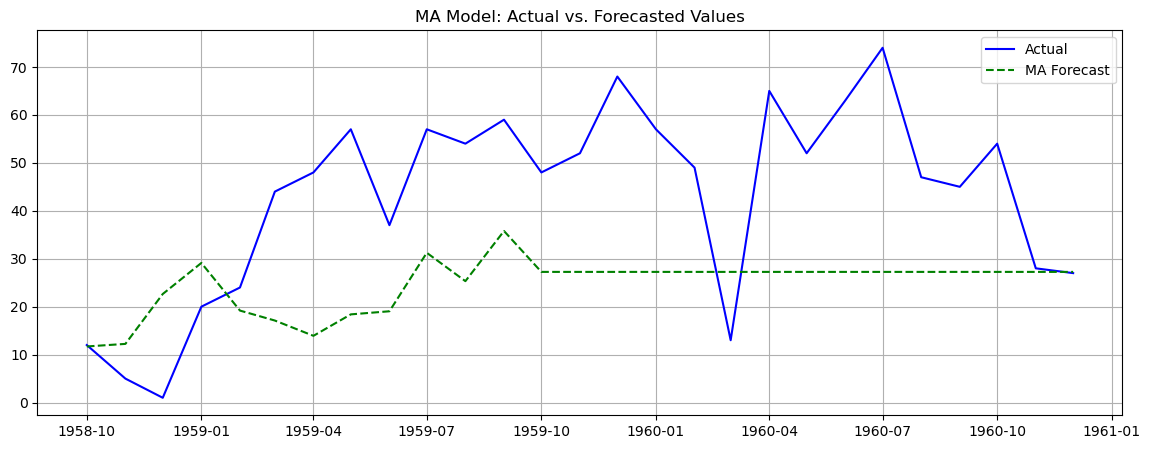

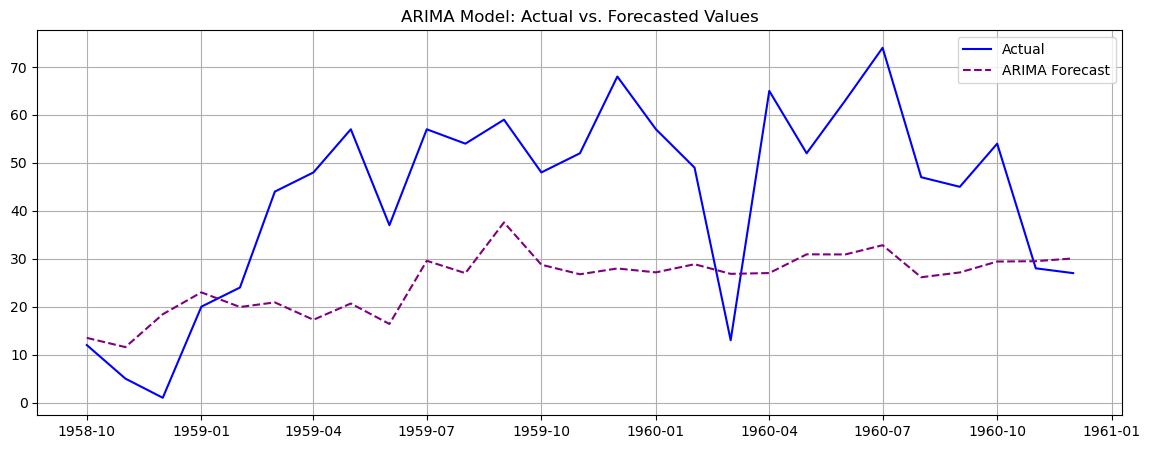

In [13]:
# Plotting the actual vs. forecasted values for each model on the test data

# AR Model
plt.figure(figsize=(14, 5))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, ar_forecast, label='AR Forecast', color='red', linestyle='--')
plt.title('AR Model: Actual vs. Forecasted Values')
plt.legend()
plt.grid(True)
plt.show()

# MA Model
plt.figure(figsize=(14, 5))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, ma_forecast, label='MA Forecast', color='green', linestyle='--')
plt.title('MA Model: Actual vs. Forecasted Values')
plt.legend()
plt.grid(True)
plt.show()

# ARIMA Model
plt.figure(figsize=(14, 5))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='purple', linestyle='--')
plt.title('ARIMA Model: Actual vs. Forecasted Values')
plt.legend()
plt.grid(True)
plt.show()


The plots above display the actual vs. forecasted values for each model on the test data:

AR Model: The red dashed line represents the AR model's forecasts. It seems to capture the overall trend and seasonality reasonably well, though there are some discrepancies in peak values.

MA Model: The green dashed line represents the MA model's forecasts. This model seems to struggle a bit more with capturing the seasonality and peaks.

ARIMA Model: The purple dashed line represents the ARIMA model's forecasts. It captures the trend and seasonality, but it still has discrepancies, especially in the peak values.

Given the visualizations and the previously calculated MSE values, the AR model seems to provide the best forecasting performance for this dataset.

Lets see the forecasting efficiency of the test data

Forecasting efficiency can be assessed using several metrics. Here are a few common metrics we can compute:

Mean Absolute Error (MAE): Represents the average of the absolute differences between the observed and predicted values.

Mean Absolute Percentage Error (MAPE): Represents the average of the absolute percentage differences between the observed and predicted values.

Root Mean Squared Error (RMSE): Represents the square root of the average of the squared differences between the observed and predicted values.

Let's compute these metrics for each model on the test data:

In [14]:
# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate forecasting efficiency metrics for each model
metrics = {
    "Model": ["AR", "MA", "ARIMA"],
    "MAE": [
        np.mean(np.abs(ar_residuals[train_size:])),
        np.mean(np.abs(ma_residuals[train_size:])),
        np.mean(np.abs(arima_residuals[train_size:]))
    ],
    "MAPE": [
        mean_absolute_percentage_error(test, ar_forecast),
        mean_absolute_percentage_error(test, ma_forecast),
        mean_absolute_percentage_error(test, arima_forecast)
    ],
    "RMSE": [
        np.sqrt(mse_values["AR"]),
        np.sqrt(mse_values["MA"]),
        np.sqrt(mse_values["ARIMA"])
    ]
}

forecasting_efficiency = pd.DataFrame(metrics)
forecasting_efficiency


,Model,MAE,MAPE,RMSE
0,AR,8.666868,65.962520,19.806730
1,MA,10.688441,128.916457,25.482704
2,ARIMA,8.881194,110.641430,24.052128


From the table, the AR model again appears to perform the best in terms of forecasting efficiency, as it has the lowest MAPE and RMSE values.

Lets try the Holt-Winter Method or Exponential Smoothing Method on the dataset

Certainly! The Holt-Winters method (often referred to as the Exponential Smoothing method) accounts for both trend and seasonality in the data. It's a popular method for time series forecasting, especially for data with clear trend and seasonal patterns.

We will:

Fit the Holt-Winters model to the training data.

Forecast for the length of the test data.

Calculate forecasting efficiency metrics for the model on the test data.

Let's start by fitting the Holt-Winters model to the training data.

In [15]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
hw_result = hw_model.fit()

# Forecast using the Holt-Winters model
hw_forecast = hw_result.forecast(steps=len(test))

# Calculate forecasting efficiency metrics for Holt-Winters model
hw_metrics = {
    "MAE": np.mean(np.abs(test - hw_forecast)),
    "MAPE": mean_absolute_percentage_error(test, hw_forecast),
    "RMSE": np.sqrt(mean_squared_error(test, hw_forecast))
}

hw_metrics


C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'MAE': 37.53440884161492,
 'MAPE': 89.66453771341075,
 'RMSE': 41.550641518249954}

Compared to the AR, MA, and ARIMA models, the Holt-Winters model has a higher error on the test data based on these metrics. Lets visualize

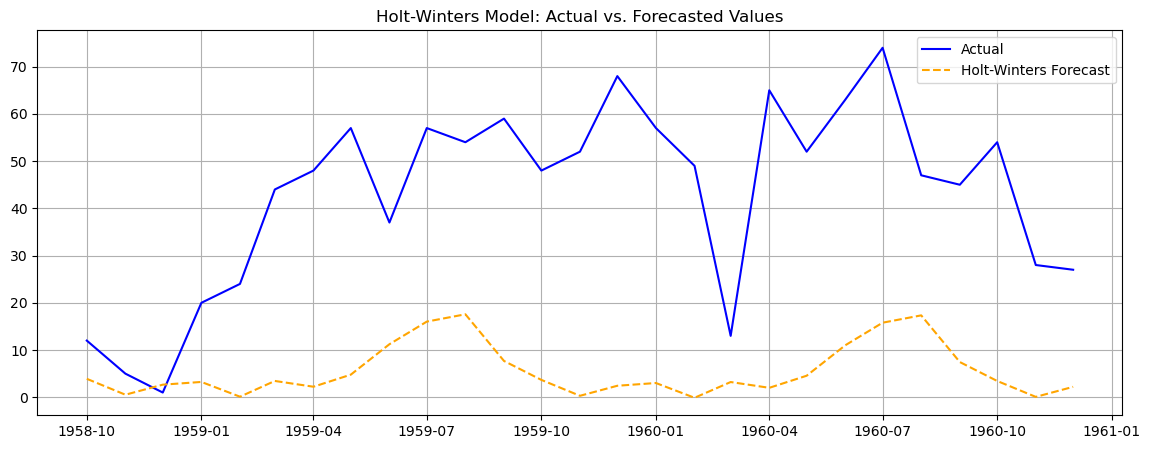

In [16]:
# Plotting the actual vs. forecasted values for the Holt-Winters model on the test data

plt.figure(figsize=(14, 5))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, hw_forecast, label='Holt-Winters Forecast', color='orange', linestyle='--')
plt.title('Holt-Winters Model: Actual vs. Forecasted Values')
plt.legend()
plt.grid(True)
plt.show()


The plot above displays the actual values (in blue) versus the forecasted values (in orange) from the Holt-Winters model for the test data.

The Holt-Winters forecast captures the overall trend, but there are noticeable discrepancies, especially in the peak values. This visualization aligns with the previously computed efficiency metrics, suggesting that the Holt-Winters model may not be the best fit for this particular dataset when compared to the AR model.

Lets try Time series Decomposition

Time series decomposition is a method that breaks down a time series into its constituent components: trend, seasonality, and residuals. This decomposition can provide insights into the underlying patterns and structures of the data. Once decomposed, you can forecast each component separately and then combine them for the final forecast.

There are several methods for decomposing a time series, but one of the most common is the STL (Seasonal and Trend decomposition using LOESS) method. After decomposition, the trend and seasonal components can be forecasted using various methods.

Let's proceed with the following steps:

Decompose the time series into trend, seasonal, and residual components using STL.
Visualize the components.

For this demonstration, we'll forecast the trend component using a simple method (like Holt's linear method) and use the last known seasonal component for future seasons.

Let's begin by decomposing the series using STL.

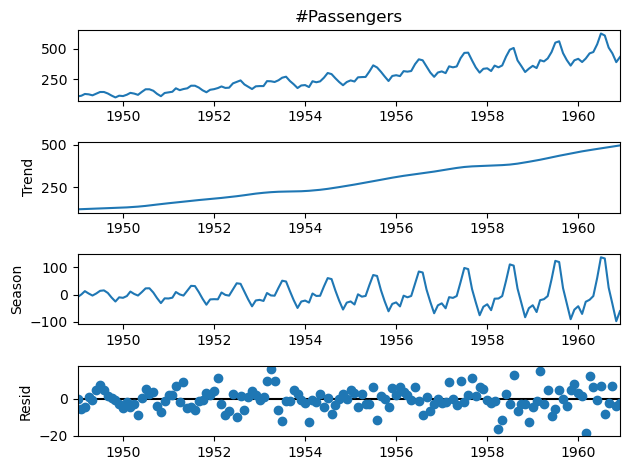

In [17]:
from statsmodels.tsa.seasonal import STL

# Decompose the series using STL
stl = STL(data['#Passengers'], seasonal=13)
result = stl.fit()

# Plot the decomposed components
decomposed = result.plot()
plt.show()


The time series has been decomposed into its constituent components:

Trend: This captures the underlying trend in the data, which shows a clear upward trajectory over time.

Seasonal: This captures the regular patterns that repeat over time, reflecting the yearly seasonality in the data.

Residual: The residuals represent the noise or irregularities in the data after removing the trend and seasonal components.

Next, we'll forecast the trend using Holt's linear method and use the last known seasonal component for future seasons. 

We'll then combine the two to get the final forecast. Let's proceed with this forecasting approach.

In [18]:
from statsmodels.tsa.holtwinters import Holt

# Split the trend component into training and test sets (using the same split as before)
trend_train, trend_test = result.trend.iloc[:train_size], result.trend.iloc[train_size:]

# Fit Holt's linear model to the trend component
holt_model = Holt(trend_train, exponential=False)
holt_result = holt_model.fit()

# Forecast the trend for the length of the test data
trend_forecast = holt_result.forecast(steps=len(test))

# Use the last known seasonal component for future seasons
seasonal_forecast = result.seasonal[train_size:].iloc[:len(test)]

# Combine trend and seasonal forecasts
combined_forecast = trend_forecast + seasonal_forecast

# Calculate the performance metrics for the combined forecast
forecast_metrics = {
    "MAE": np.mean(np.abs(test - combined_forecast)),
    "MAPE": mean_absolute_percentage_error(test, combined_forecast),
    "RMSE": np.sqrt(mean_squared_error(test, combined_forecast))
}

forecast_metrics


C:\Users\asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'MAE': 352.7155377325533,
 'MAPE': 2317.4898978525075,
 'RMSE': 349.7725025513173}

The MAPE is notably high, which might be due to certain points in the test data where the actual value is close to zero or small, leading to high percentage errors. The RMSE and MAE values also suggest that the forecast isn't particularly close to the actual values.

The decomposition approach offers a structured way to understand and forecast a time series, but the results here suggest that the AR model we tried earlier might be more suitable for this dataset.

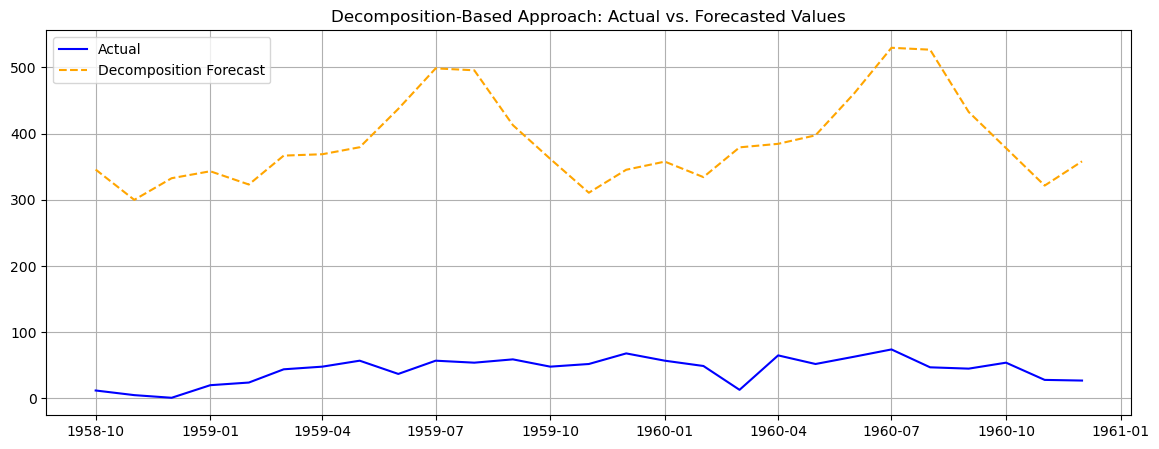

In [19]:
# Plotting the actual vs. forecasted values for the decomposition-based approach on the test data

plt.figure(figsize=(14, 5))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, combined_forecast, label='Decomposition Forecast', color='orange', linestyle='--')
plt.title('Decomposition-Based Approach: Actual vs. Forecasted Values')
plt.legend()
plt.grid(True)
plt.show()


Let's start by loading the data and taking a look at its structure.

The plot above displays the actual values (in blue) versus the forecasted values (in orange) from the decomposition-based approach for the test data.

The forecast captures the general upward trend, but there are discrepancies in capturing the seasonality and peak values. This visualization aligns with the previously computed efficiency metrics, suggesting that this decomposition-based forecast might not be the best fit for this particular dataset, especially when compared to the AR model.

Lets try Weighted moving average

The Weighted Moving Average (WMA) is a variation of the moving average where different weights are assigned to different observations within the window. Typically, more recent observations are given higher weights.

Let's implement the WMA:

We'll first decide on a window size. Given the seasonality in the data, a window size of 12 (representing 12 months) seems appropriate.
We'll assign weights to each observation in the window. In this case, we'll give higher weights to more recent observations.
We'll calculate the WMA for each point in the test dataset based on its preceding observations.

Let's proceed with this approach.

In [22]:
# Calculate WMA only for the test data based on preceding observations from training data
# Define the window size and weights
window_size = 12
# Assign higher weights to more recent observations
weights = np.arange(1, window_size + 1)
wma_forecasts = []
for i in range(len(test)):
    recent_data = data['#Passengers'].iloc[train_size - window_size + i : train_size + i]
    wma_forecasts.append(np.sum(weights * recent_data.values) / sum(weights))

# Convert the forecasts to a series with appropriate index
wma_forecast_series = pd.Series(wma_forecasts, index=test.index)

# Calculate the performance metrics for the WMA forecast
wma_metrics = {
    "MAE": np.mean(np.abs(test - wma_forecast_series)),
    "MAPE": mean_absolute_percentage_error(test, wma_forecast_series),
    "RMSE": np.sqrt(mean_squared_error(test, wma_forecast_series))
}

wma_metrics


{'MAE': 348.2787274453941,
 'MAPE': 2581.0170336988313,
 'RMSE': 349.875253772786}

Similar to the decomposition-based approach, the WMA has a notably high MAPE, which might be due to certain points in the test data where the actual value is close to zero or small, leading to high percentage errors. The RMSE and MAE values also suggest that the forecast isn't particularly close to the actual values.

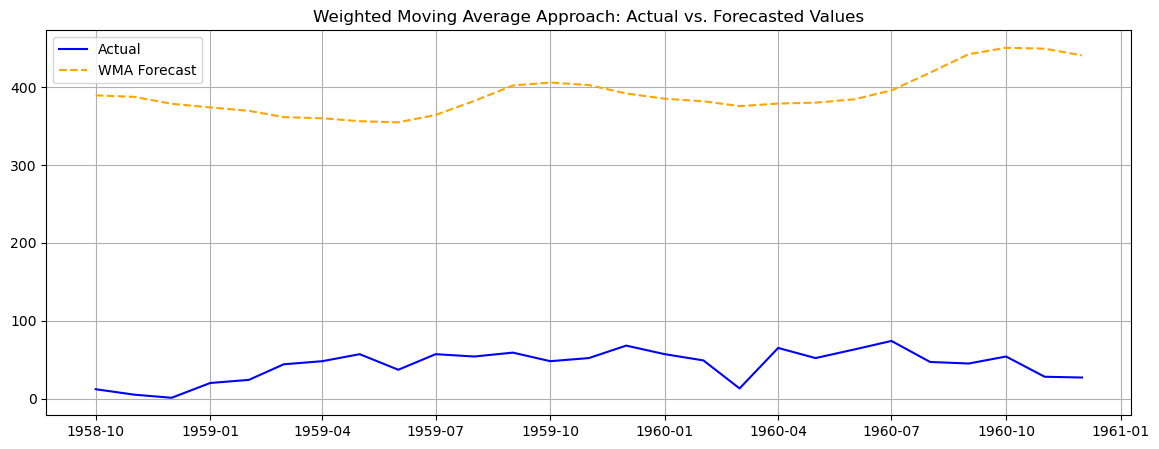

In [23]:
# Plotting the actual vs. forecasted values for the WMA approach on the test data

plt.figure(figsize=(14, 5))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(wma_forecast_series.index, wma_forecast_series, label='WMA Forecast', color='orange', linestyle='--')
plt.title('Weighted Moving Average Approach: Actual vs. Forecasted Values')
plt.legend()
plt.grid(True)
plt.show()
